In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re
from konlpy.tag import Okt
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [3]:
train_data = pd.read_table('dataset/movie/ratings_train.txt')
test_data = pd.read_table('dataset/movie/ratings_test.txt')

In [4]:
len(train_data), len(test_data)

(150000, 50000)

In [5]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


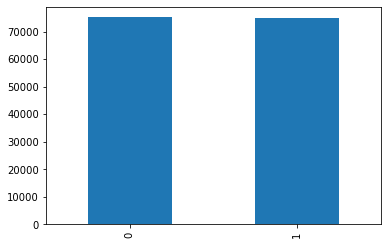

In [7]:
train_data['label'].value_counts().plot(kind='bar')

In [8]:
train_data['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [9]:
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

True
True


In [10]:
print(train_data.isnull().sum())

id          0
document    5
label       0
dtype: int64


In [11]:
print(test_data.isnull().sum())

id          0
document    3
label       0
dtype: int64


In [12]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [13]:
train_data = train_data.dropna(how='any')
test_data = test_data.dropna(how='any')

In [14]:
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

False
False


### 2. 전처리

In [15]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]"," ")
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [16]:
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]"," ")
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [17]:
from tqdm.notebook import tqdm
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다''의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt = Okt()

x_train = []

for sentence in tqdm(train_data['document']):
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    x_train.append(temp_x)

In [21]:
x_test = []
for sentence in tqdm(test_data['document']):
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    x_test.append(temp_x)

In [22]:
x_train[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [26]:
max_word = 35000
toeknizer = Tokenizer(num_words=max_word)
toeknizer.fit_on_texts(x_train)
x_train = toeknizer.texts_to_sequences(x_train)
x_test = toeknizer.texts_to_sequences(x_test)

In [30]:
x_train[:3]

[[46, 457, 16, 263, 660],
 [899, 458, 41, 605, 1, 216, 1455, 23, 964, 680, 20],
 [377, 2448, 24878, 5025, 6273, 2, 224, 9]]

In [31]:
print(max(len(s) for s in x_train))
print(sum(map(len, x_train)) / len(x_train))

70
10.667368912297077


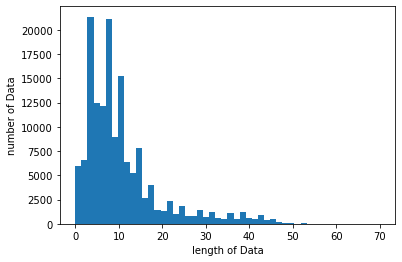

In [32]:
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [33]:
max_len = 30
x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [34]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

### LSTM 감성 분류

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.callbacks import ModelCheckpoint

In [37]:
model = Sequential([
    Embedding(max_word, 100),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

In [38]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model_path = 'model/naver-{epoch:02d}-{val_loss:.4f}.hdf5'
cp = ModelCheckpoint(model_path, verbose=1, save_best_only=True)

In [41]:
history = model.fit(x_train, y_train, epochs =4, batch_size=60, validation_split=0.2,callbacks=[cp])

Train on 119996 samples, validate on 29999 samples
Epoch 1/4
119996/119996 [==============================] - 125s 1ms/step - loss: 0.3883 - accuracy: 0.8217 - val_loss: 0.3499 - val_accuracy: 0.8451

Epoch 00001: val_loss improved from inf to 0.34986, saving model to model/naver-01-0.3499.hdf5
Epoch 2/4
119996/119996 [==============================] - 124s 1ms/step - loss: 0.3265 - accuracy: 0.8568 - val_loss: 0.3371 - val_accuracy: 0.8515

Epoch 00002: val_loss improved from 0.34986 to 0.33707, saving model to model/naver-02-0.3371.hdf5
Epoch 3/4
119996/119996 [==============================] - 125s 1ms/step - loss: 0.2998 - accuracy: 0.8723 - val_loss: 0.3373 - val_accuracy: 0.8573

Epoch 00003: val_loss did not improve from 0.33707
Epoch 4/4
119996/119996 [==============================] - 130s 1ms/step - loss: 0.2788 - accuracy: 0.8832 - val_loss: 0.3312 - val_accuracy: 0.8586

Epoch 00004: val_loss improved from 0.33707 to 0.33116, saving model to model/naver-04-0.3312.hdf5


In [42]:
from keras.models import load_model

In [43]:
del model

In [44]:
model =load_model('model/naver-04-0.3312.hdf5')

In [46]:
model.evaluate(x_test, y_test)[1]

49997/49997 [==============================] - 8s 151us/step


0.8549712896347046

In [47]:
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']

y_loss = history.history['loss']
y_acc = history.history['accuracy']

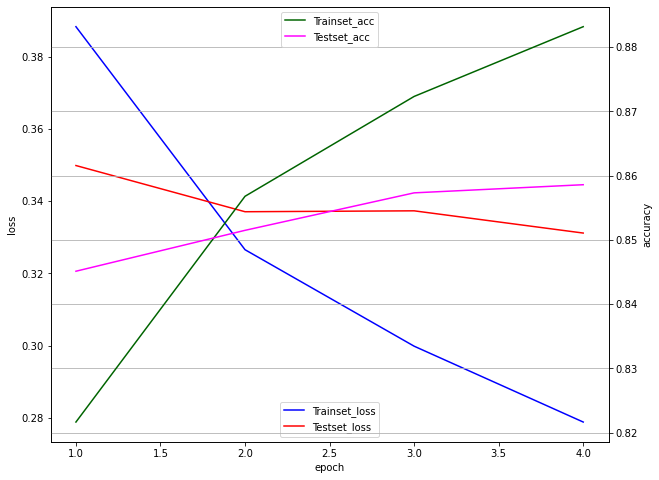

In [49]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10, 8))

ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower center')
ax1.legend(loc='upper center')
plt.grid()
plt.show()